
# MSM of Brownian dynamics simulations of diffusion on a 2D surface

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import time
import itertools
import h5py
import numpy as np
from scipy.stats import norm
from scipy.stats import expon
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

/home/aaguirre/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Here we upload the data obtained from Brownian Dynamics simulations of isotropic diffusion on a 2D potential.

In [2]:
h5file = "data/cossio_kl1.3_Dx1_Dq1.h5"
f = h5py.File(h5file, 'r')
data = np.array(f['data'])
f.close()

### Trajectory analysis

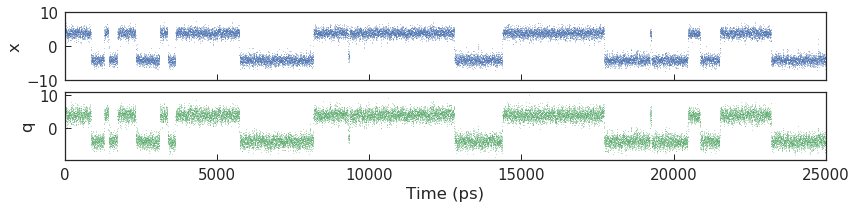

In [4]:
fig, ax = plt.subplots(2,1,figsize=(12,3), sharex=True,sharey=False)
ax[0].plot(data[:,0],data[:,1],'.', markersize=1)
ax[1].plot(data[:,0],data[:,2],'g.', markersize=1)
ax[0].set_ylim(-10,10)
ax[1].set_xlim(0,25000)
ax[0].set_ylabel('x')
ax[1].set_ylabel('q')
ax[1].set_xlabel('Time (ps)')
plt.tight_layout(h_pad=0)

/home/aaguirre/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/aaguirre/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


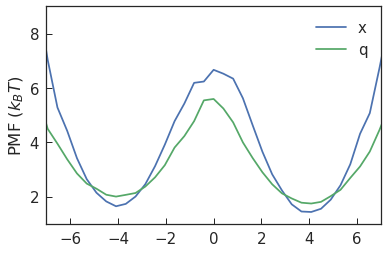

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
hist, bin_edges = np.histogram(data[:,1], bins=np.linspace(-10,10,50), normed=True)
bin_centers = [0.5*(bin_edges[i]+bin_edges[i+1]) \
               for i in range(len(bin_edges)-1)]
ax.plot(bin_centers, -np.log(hist),label="x")
hist, bin_edges = np.histogram(data[:,2], bins=np.linspace(-10,10,50), normed=True)
bin_centers = [0.5*(bin_edges[i]+bin_edges[i+1]) \
               for i in range(len(bin_edges)-1)]
ax.plot(bin_centers, -np.log(hist),label="q")
ax.set_xlim(-7,7)
ax.set_ylim(1,9)
#ax.set_xlabel('x')
ax.set_ylabel('PMF ($k_BT$)')
ax.legend()


Representation of the bistable 2D free energy surface as a function of the measured q and molecular x extensions:

/home/aaguirre/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


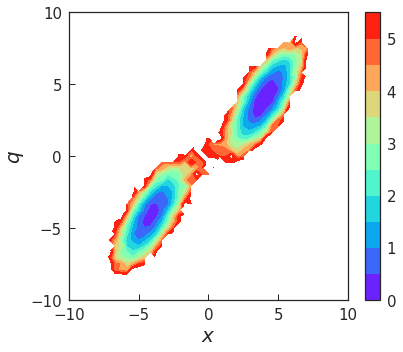

In [6]:
H, x_edges, y_edges = np.histogram2d(data[:,1],data[:,2], \
            bins=[np.linspace(-10,10,50), np.linspace(-10,10,50)])

fig, ax = plt.subplots(figsize=(6,5))
pmf = -np.log(H.transpose())
pmf -= np.min(pmf)
cs = ax.contourf(pmf, extent=[x_edges.min(), x_edges.max(), \
                     y_edges.min(), y_edges.max()], \
                   cmap=cm.rainbow, levels=np.arange(0, 6,0.5))

cbar = plt.colorbar(cs)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_yticks(range(-10,11,5))
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$q$', fontsize=20)
plt.tight_layout()

### Assignment

Now we discretize the trajectory using the states obtained from partitioning the 2D free energy surface of the diffusion of the molecule. We first need to import the function that makes the grid.


In [7]:
from scipy.stats import binned_statistic_2d

In [237]:
statistic, x_edge, y_edge, binnumber = binned_statistic_2d(data[:,1],data[:,2],
                                                           None,'count',bins=[np.linspace(-10,10,20),\
                                                                              np.linspace(-10,10,20)])

/home/aaguirre/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


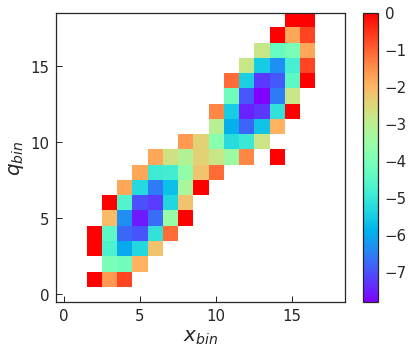

In [236]:
fig, ax = plt.subplots(figsize=(6,5))

grid = ax.imshow(-np.log(statistic.transpose()),origin="lower",cmap=plt.cm.rainbow)

cbar = plt.colorbar(grid)
ax.set_yticks(range(0,20,5))
ax.set_xticks(range(0,20,5))
ax.set_xlabel('$x_{bin}$', fontsize=20)
ax.set_ylabel('$q_{bin}$', fontsize=20)
plt.tight_layout()

(0, 500)

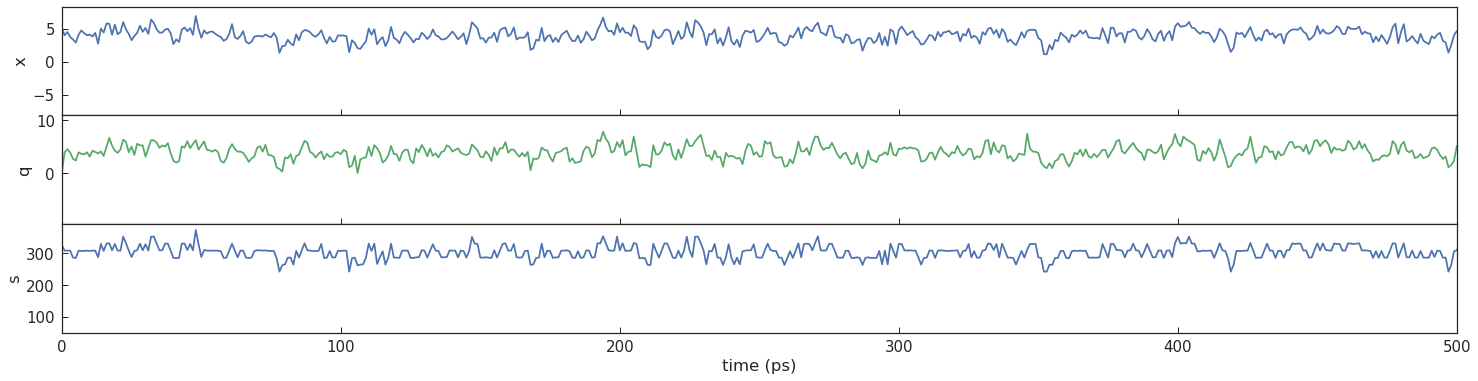

In [113]:
fig,ax=plt.subplots(3,1,figsize=(25,6),sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)
ax[0].plot(range(0,len(data[:,1])),data[:,1])
ax[1].plot(range(0,len(data[:,2])),data[:,2],color="g")
ax[2].plot(binnumber)
ax[0].set_ylabel('x')
ax[1].set_ylabel('q')
ax[2].set_ylabel("s")
ax[2].set_xlabel("time (ps)")
ax[2].set_xlim(0,500)

### Master Equation Model 

In [114]:
from mastermsm.trajectory import traj
from mastermsm.msm import msm

In [115]:
distraj=traj.TimeSeries(distraj=list(binnumber),dt=1)
distraj.find_keys()
distraj.keys.sort()

In [116]:
msm_2D=msm.SuperMSM([distraj])


 Building MSM from 
     # states: 91


#### Convergence Test

In [117]:
for i in [1, 2, 5, 10, 20, 50, 100]:
    msm_2D.do_msm(i, sym=False)
    msm_2D.msms[i].do_trans(evecs=True)
    msm_2D.msms[i].boots(plot=False)

/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/hom

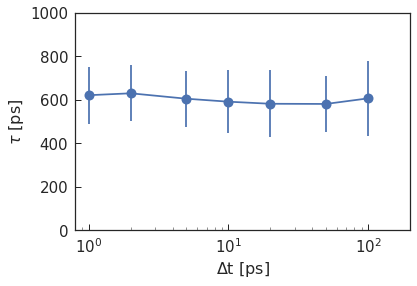

In [118]:
tau_vs_lagt = np.array([[x,msm_2D.msms[x].tauT[0],msm_2D.msms[x].tau_std[0]] \
               for x in sorted(msm_2D.msms.keys())])
fig, ax = plt.subplots()
ax.errorbar(tau_vs_lagt[:,0],tau_vs_lagt[:,1],fmt='o-', yerr=tau_vs_lagt[:,2], markersize=10)
#ax.fill_between(10**np.arange(-0.2,3,0.2), 1e-1, 10**np.arange(-0.2,3,0.2), facecolor='lightgray')
ax.set_xlabel(r'$\Delta$t [ps]', fontsize=16)
ax.set_ylabel(r'$\tau$ [ps]', fontsize=16)
ax.set_xlim(0.8,200)
ax.set_ylim(0,1000)
_ = ax.set_xscale('log')

There is no dependency of the relaxation times $\tau$ on the lag time $\Delta$t.


#### Estimation

/home/aaguirre/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


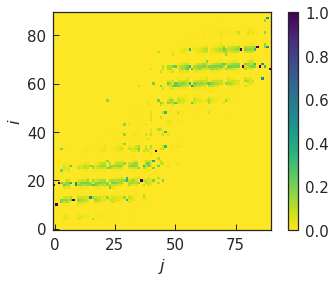

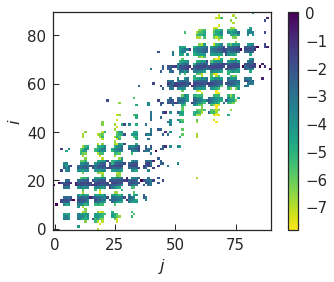

In [119]:
lt=2
plt.figure()
plt.imshow(msm_2D.msms[lt].trans, interpolation='none', \
    cmap='viridis_r',origin="lower")
plt.ylabel('$\it{i}$')
plt.xlabel('$\it{j}$')
plt.colorbar()
plt.figure()
plt.imshow(np.log(msm_2D.msms[lt].trans), interpolation='none', \
    cmap='viridis_r',origin="lower")
plt.ylabel('$\it{i}$')
plt.xlabel('$\it{j}$')
plt.colorbar()

Text(0,0.5,'$\\tau_i$ [ns]')

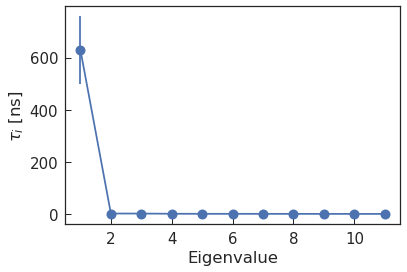

In [120]:
fig, ax = plt.subplots()
ax.errorbar(range(1,12),msm_2D.msms[lt].tauT[0:11], fmt='o-', \
            yerr= msm_2D.msms[lt].tau_std[0:11], ms=10)
ax.set_xlabel('Eigenvalue')
ax.set_ylabel(r'$\tau_i$ [ns]') 

The first mode captured by $\lambda_1$ is significantly slower than the others. That mode, which is described by the right eigenvector $\psi^R_1$ as the transition of the protein between the folded and unfolded states.

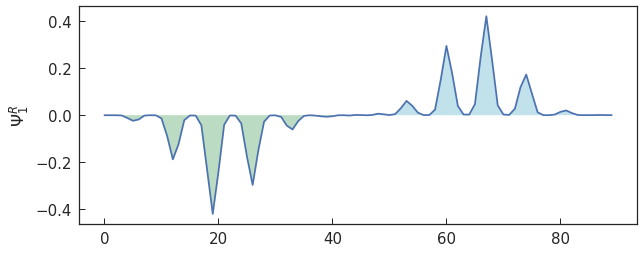

In [121]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(msm_2D.msms[2].rvecsT[:,1])
ax.fill_between(range(len(msm_2D.msms[lt].rvecsT[:,1])), 0, \
                msm_2D.msms[lt].rvecsT[:,1], \
                where=msm_2D.msms[lt].rvecsT[:,1]>0,\
                facecolor='c', interpolate=True,alpha=.4)
ax.fill_between(range(len(msm_2D.msms[lt].rvecsT[:,1])), 0, \
                msm_2D.msms[lt].rvecsT[:,1], \
                where=msm_2D.msms[lt].rvecsT[:,1]<0,\
                facecolor='g', interpolate=True,alpha=.4)
ax.set_ylabel("$\Psi^R_1$")
plt.show()

The projection of $\psi^R_1$ on the 2D grid shows the transitions between the two conformational states (red and blue).

/home/aaguirre/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


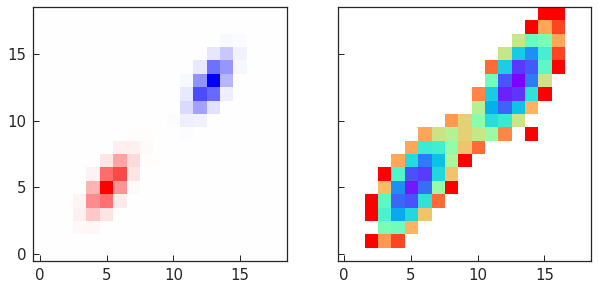

In [241]:
fig,ax=plt.subplots(1,2,figsize=(10,5),sharey=True,sharex=True)
rv_mat = np.zeros((19,19), float)
for i in [x for x in zip(msm_2D.msms[lt].keep_keys, \
                         msm_2D.msms[lt].rvecsT[:,1])]:
    
    unr_ind=np.unravel_index(i[0],(21,21))
    
    rv_mat[unr_ind[0]-1,unr_ind[1]-1] = -i[1]
    
ax[0].imshow(rv_mat.transpose(), interpolation="none", \
             cmap='bwr',origin="lower")
ax[1].imshow(-np.log(statistic.transpose()),cmap=plt.cm.rainbow,origin="lower")


ax[1].set_yticks(range(0,20,5))
ax[1].set_xticks(range(0,20,5))